<a href="https://colab.research.google.com/github/elsy-torres/script/blob/main/FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
from scipy import fftpack

#Cargar datos 

In [ ]:
data=pd.read_csv('NZ007.txt',names=['time','amp'],skiprows=3,sep='\s+',engine='python')
data.head(10)

In [ ]:
data.tail()

In [ ]:
print(len(data))

# Declarar vector en el dominio de la frcuencia

##Vector para el sismograma completo

In [ ]:
fo=1/328.94
N=len(data)
F_N=(N/2)*fo
t=np.arange(0,F_N,fo)
print(t)

# Vector de tiempo de 0 a 120 s

In [89]:
t_1= np.arange(0,120,0.02)
print(len(t_1))

6000


# Vector de tiempo de 120 a 240 s

In [90]:
t_2=np.arange(120,240,0.02)
print(len(t_2))

6000


In [93]:
y_1= data['amp'].iloc[0:6000]
print(len(y_1))

6000


In [95]:
y_2=data['amp'].iloc[6000:12000]
print(len(y_2))

6000


#Filtro

In [ ]:
data['filtro']=1
data

In [106]:
A=[A, np.ones(len(t_1)),np.ones(len(t_2))]
print(A)


[(array([1., 1., 1., ..., 1., 1., 1.]), array([1., 1., 1., ..., 1., 1., 1.])), array([1., 1., 1., ..., 1., 1., 1.]), array([1., 1., 1., ..., 1., 1., 1.])]


In [16]:
data['filtro'].iloc[data.index<1000]=signal.cosine(1000)
data['filtro'].iloc[data.index>15447]=signal.cosine(1000)
data.tail()

,time,amp,filtro
16443,328.86,0.72716,0.014137
16444,328.88,0.61736,0.010995
16445,328.90,0.54991,0.007854
16446,328.92,0.59976,0.004712
16447,328.94,0.41080,0.001571


In [19]:
data['signal_filter']= data['filtro']*data['amp']
data.head()

,time,amp,filtro,signal_filter
0,0.00,-0.244690,0.001571,-0.000384
1,0.02,0.055570,0.004712,0.000262
2,0.04,0.034080,0.007854,0.000268
3,0.06,-0.035078,0.010995,-0.000386
4,0.08,0.065622,0.014137,0.000928


# Gráficos

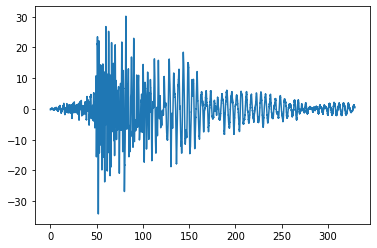

In [20]:
plt.plot(data['time'],data['amp'])
_=plt.show()

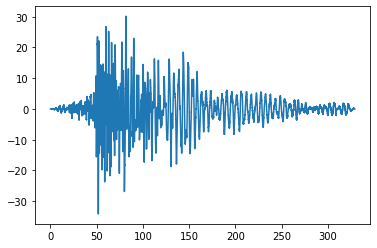

In [21]:
plt.plot(data['time'],data['signal_filter'])
_=plt.show()

# Cortes de ventana de 0-120, 120-240 sin filtrar


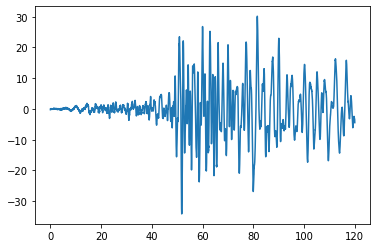

In [96]:
plt.plot(t_1,y_1)
_=plt.show()

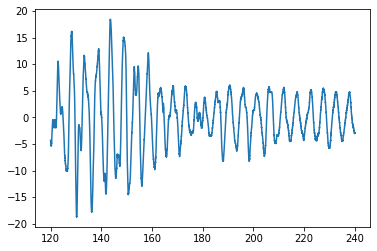

In [97]:
plt.plot(t_2,y_2)
_=plt.show()

# Realizar la transformada

In [22]:
data['fft']=np.fft.fft(data['signal_filter'])
data.head()

,time,amp,filtro,signal_filter,fft
0,0.00,-0.244690,0.001571,-0.000384,13.838794-0.000000j
1,0.02,0.055570,0.004712,0.000262,43.041462+22.215780j
2,0.04,0.034080,0.007854,0.000268,3.100171+29.423475j
3,0.06,-0.035078,0.010995,-0.000386,23.437134+54.915609j
4,0.08,0.065622,0.014137,0.000928,-22.689074+36.965522j


#Calcular la amplitud espectral

In [23]:
data['asb']= np.abs(data['fft'])
data.head()

,time,amp,filtro,signal_filter,fft,asb
0,0.00,-0.244690,0.001571,-0.000384,13.838794-0.000000j,13.838794
1,0.02,0.055570,0.004712,0.000262,43.041462+22.215780j,48.436642
2,0.04,0.034080,0.007854,0.000268,3.100171+29.423475j,29.586347
3,0.06,-0.035078,0.010995,-0.000386,23.437134+54.915609j,59.707817
4,0.08,0.065622,0.014137,0.000928,-22.689074+36.965522j,43.373308


# Calcular la fase

In [64]:
data['fase']=np.arctan((data['fft'].values.imag/data['fft'].values.real)*np.pi/180)
data.head()

,time,amp,filtro,signal_filter,fft,asb,fase,angle,ANGLE
0,0.00,-0.244690,0.001571,-0.000384,13.838794-0.000000j,13.838794,-1.792253e-17,-1.026885e-15,0.241533-0.000000j
1,0.02,0.055570,0.004712,0.000262,43.041462+22.215780j,48.436642,9.008245e-03,4.764827e-01,0.751215+0.387739j
2,0.04,0.034080,0.007854,0.000268,3.100171+29.423475j,29.586347,1.641572e-01,1.465820e+00,0.054108+0.513537j
3,0.06,-0.035078,0.010995,-0.000386,23.437134+54.915609j,59.707817,4.087208e-02,1.167415e+00,0.409055+0.958458j
4,0.08,0.065622,0.014137,0.000928,-22.689074+36.965522j,43.373308,-2.842762e-02,2.121294e+00,-0.395999+0.645170j


In [74]:
data['angle']=np.angle(data['fft'])
data.head()

,time,amp,filtro,signal_filter,fft,asb,fase,angle,ANGLE
0,0.00,-0.244690,0.001571,-0.000384,13.838794-0.000000j,13.838794,-1.792253e-17,-1.026885e-15,-1.792253e-17
1,0.02,0.055570,0.004712,0.000262,43.041462+22.215780j,48.436642,9.008245e-03,4.764827e-01,8.316192e-03
2,0.04,0.034080,0.007854,0.000268,3.100171+29.423475j,29.586347,1.641572e-01,1.465820e+00,2.558338e-02
3,0.06,-0.035078,0.010995,-0.000386,23.437134+54.915609j,59.707817,4.087208e-02,1.167415e+00,2.037524e-02
4,0.08,0.065622,0.014137,0.000928,-22.689074+36.965522j,43.373308,-2.842762e-02,2.121294e+00,3.702356e-02


In [79]:
data['ANGLE']= data['angle']*(180/np.pi)
data.head()

,time,amp,filtro,signal_filter,fft,asb,fase,angle,ANGLE
0,0.00,-0.244690,0.001571,-0.000384,13.838794-0.000000j,13.838794,-1.792253e-17,-1.026885e-15,-5.883620e-14
1,0.02,0.055570,0.004712,0.000262,43.041462+22.215780j,48.436642,9.008245e-03,4.764827e-01,2.730045e+01
2,0.04,0.034080,0.007854,0.000268,3.100171+29.423475j,29.586347,1.641572e-01,1.465820e+00,8.398529e+01
3,0.06,-0.035078,0.010995,-0.000386,23.437134+54.915609j,59.707817,4.087208e-02,1.167415e+00,6.688796e+01
4,0.08,0.065622,0.014137,0.000928,-22.689074+36.965522j,43.373308,-2.842762e-02,2.121294e+00,1.215412e+02


#Gráficos

# Espectro de ampitud en el dominio de la frecuencia

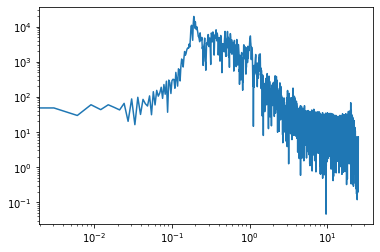

In [27]:
plt.loglog(t,data['asb'].iloc[0:8224])
_=plt.show()

# Espectro de amplitud en el dominio del tiempo

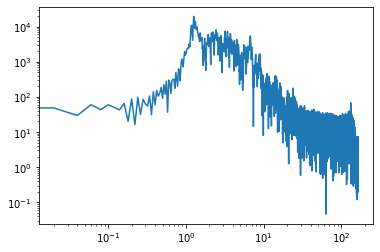

In [29]:
plt.loglog(data['time'].iloc[0:8224],data['asb'].iloc[0:8224])
_=plt.show()

#FASE

## ESPECTRO DE FASE EN EL DOMINIO DE LA FRECUENCIA

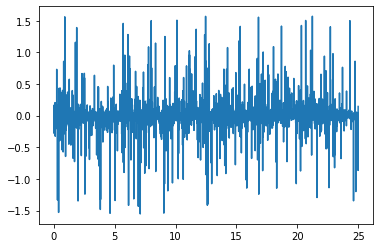

In [82]:
plt.plot((t),(data['fase'].iloc[0:8224]))
_=plt.show()